In [13]:
import datetime #날짜와 시간을 처리하기 위한 모듈
import time #시간 관련 함수를 제공하는 모듈
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [14]:
df = pd.read_csv("C:/datasets/abalone.csv")

In [15]:
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


In [17]:
df['Sex'] = df['Sex'].map({'M':0, 'F':1, 'I':2})

In [18]:
X = df.drop('Rings', axis=1)

In [19]:
y = df['Rings']

In [20]:
# 데이터 스케일링 (0과 1 사이의 값으로 변환)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# 레이블을 카테고리화 (다중 분류를 위한 준비)
from tensorflow.keras.utils import to_categorical
y_categorical = to_categorical(y)

In [22]:
window_size = 10

In [23]:
data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size]  
    _y = y[i + window_size]      
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

        id  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
4166  4166    2   0.475     0.365   0.115        0.4990          0.2320   
4167  4167    0   0.500     0.380   0.125        0.5770          0.2690   
4168  4168    1   0.515     0.400   0.125        0.6150          0.2865   
4169  4169    0   0.520     0.385   0.165        0.7910          0.3750   
4170  4170    0   0.550     0.430   0.130        0.8395          0.3155   
4171  4171    0   0.560     0.430   0.155        0.8675          0.4000   
4172  4172    1   0.565     0.450   0.165        0.8870          0.3700   
4173  4173    0   0.590     0.440   0.135        0.9660          0.4390   
4174  4174    0   0.600     0.475   0.205        1.1760          0.5255   
4175  4175    1   0.625     0.485   0.150        1.0945          0.5310   

      Viscera_weight  Shell_weight  
4166          0.0885        0.1560  
4167          0.1265        0.1535  
4168          0.1230        0.1765  
4169          0.1800      

In [25]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))
# 훈련 데이터와 테스트 데이터 분리
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

전체 데이터의 크기 : 4167 4167
훈련 데이터의 크기 : (2916, 10, 9) (2916,)
테스트 데이터의 크기 : (1251, 10, 9) (1251,)


In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN

In [27]:
model = Sequential()

# 첫 번째 LSTM 레이어 추가
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(window_size, X.shape[1])))
model.add(Dropout(0.1))

# 두 번째 LSTM 레이어 추가
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))

# 출력층 추가
model.add(Dense(units=1))

model.summary()

C:\Users\yujin\anaconda32\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 20)              │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20)                  │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,701 (22.27 KB)

 Trainable params: 5,701 (22.27 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(train_X, train_y, epochs=70, batch_size=30)

# 테스트 데이터로 예측
pred_y = model.predict(test_X)

# 모델 평가
model.evaluate(test_X, test_y)

Epoch 1/70
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 16998.6406
Epoch 2/70
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 306.6890
Epoch 3/70
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.5395
Epoch 4/70
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.7358
Epoch 5/70
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 51.4918
Epoch 6/70
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.4117
Epoch 7/70
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 57.8119
Epoch 8/70
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 57.8472
Epoch 9/70
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49.1764
Epoch 10/70
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.5426
Epoch 11/70
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.9842
Epoch 12/70
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.8634
Epoch 13/70
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.4361
Epoch 14/70
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.0999
Epoch 15/70
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.9463


9.569273948669434

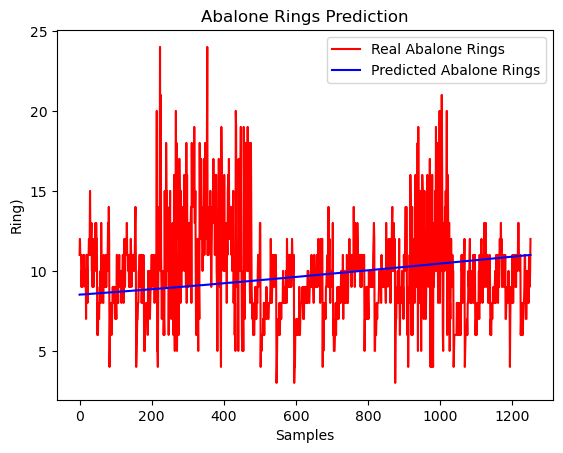

In [33]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(test_y, color='red', label='Real Abalone Rings')
plt.plot(pred_y, color='blue', label='Predicted Abalone Rings')
plt.title('Abalone Rings Prediction')
plt.xlabel('Samples')
plt.ylabel('Ring)')
plt.legend()
plt.show()

In [32]:
# MSE 계산
import tensorflow as tf

mse = tf.reduce_mean(tf.square(test_y - pred_y))
print(f'MSE: {mse.numpy()}')

MSE: 9.044855420404517
